In [6]:
import pandas as pd
import numpy as np

#INTRO:

#Buscamos si existe alguna relacion entre la cantidad de productos vendidos en cada oportunidad
# y su probabilidad de exito


data = pd.read_csv("Entrenamieto_ECI_2020_Total_Amount.csv")
columns = ['Opportunity_ID', 'Stage']

df = data.loc[:, columns]

df.Stage = (df.Stage == 'Closed Won').astype(int)

df = df.groupby('Opportunity_ID')\
       .agg({'Stage' : ['max', 'count']})\
       .reset_index()

df.columns = ['Opportunity_ID', 'Closed_Won', 'Number_of_Products']


df_filtered = df.groupby('Number_of_Products')\
                .agg({'Closed_Won' : ['mean', 'count']})\
                .reset_index()

df_filtered.columns = ['Number_of_Products', 'Closed_Won_Rate', 'Number_of_Occurrences']

df_filtered = df_filtered.loc[df_filtered.Number_of_Occurrences > 20]

df_filtered.head(10)

,Number_of_Products,Closed_Won_Rate,Number_of_Occurrences
0,1,0.476991,6780
1,2,0.566559,1555
2,3,0.701087,368
3,4,0.685567,194
4,5,0.664032,253
5,6,0.617424,264
6,7,0.494949,99
7,8,0.625000,56


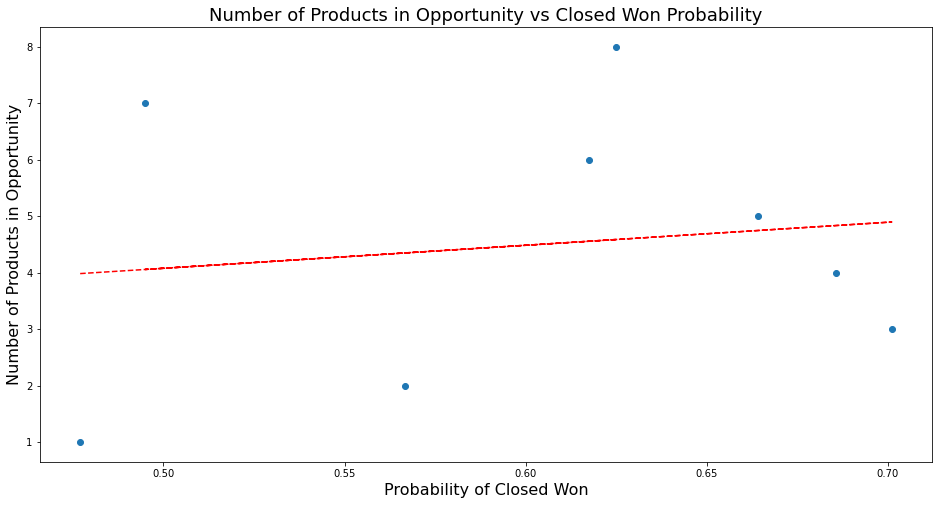

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

x = df_filtered.Closed_Won_Rate.tolist()
y = df_filtered.Number_of_Products.tolist()

plt.figure(figsize=(16, 8))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Number of Products in Opportunity vs Closed Won Probability", fontdict={'size' : 18})
plt.xlabel("Probability of Closed Won", fontdict={'size' : 16})
plt.ylabel("Number of Products in Opportunity", fontdict={'size' : 16})

plt.show()

In [8]:
#A pesar de haber filtrado por un numero de ocurrencias mayor a 20 para ocurrencia de numero de productos
#considero que los datos son demasiado pocos como para estimar si realmente existe una relacion entre 
#el numero de productos vendidos por oportunidad de la probabilidad de exito a traves de una linea de tendencia.

df_filtered = df_filtered.set_index('Number_of_Products').sort_values('Number_of_Products', ascending = True)
df_filtered

,Closed_Won_Rate,Number_of_Occurrences
Number_of_Products,,
1,0.476991,6780
2,0.566559,1555
3,0.701087,368
4,0.685567,194
5,0.664032,253
6,0.617424,264
7,0.494949,99
8,0.625000,56


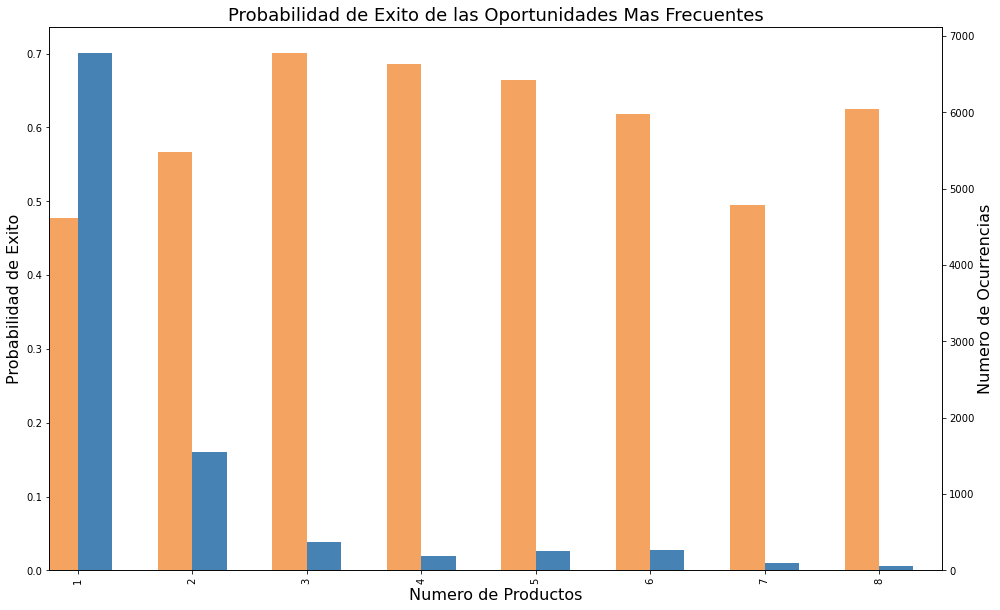

In [9]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.3
df_filtered['Closed_Won_Rate'].plot(kind='bar', color='sandybrown', ax=ax, width=width, position=1, figsize=(16,10))
df_filtered['Number_of_Occurrences'].plot(kind='bar', color='steelblue', ax=ax2, width=width, position=0, figsize=(16,10))

plt.title('Probabilidad de Exito de las Oportunidades Mas Frecuentes', fontdict={'size' : 18})
ax.set_xlabel('Numero de Productos', fontdict={'size' : 16})
ax.set_ylabel('Probabilidad de Exito', fontdict={'size' : 16})
ax2.set_ylabel('Numero de Ocurrencias', fontdict={'size' : 16})

plt.show()

In [10]:
# De este grafico podemos observar dos cosas
# La primera es que la frecuencia de oportunidades decrece con el tamaño de la oportunidad (la cantidad de productos en ella)
# La segunda, un poco mas leve, es que a partir de los 3 productos, la probabilidad de exito de las oportunidades decae, concentrandose la mayor probabilidad entre los 3 y 6 productos.
